Notebook by -- Peace


# The notebook describes steps to take before modeling (when dealing with a dataset)

The steps would be explained using the titanic datasets

Link to hackathon -- https://www.kaggle.com/c/titanic


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Exploratory data analysis

In [2]:
train= pd.read_csv('Titanic train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age,Cabin and Embarked columns have null values.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.groupby('Survived').count()['Name']

Survived
0    549
1    342
Name: Name, dtype: int64

Out of the 891 people in the training dataset, 349 people survived.

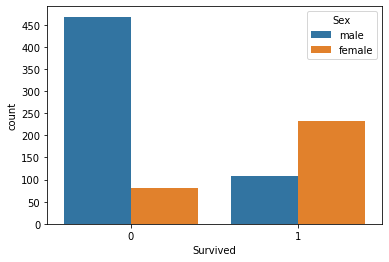

In [7]:
plt.axes(yticks=list(range(0,500,50)))
sns.countplot(data=train,x='Survived', hue='Sex' )

In [8]:
pd.crosstab(train['Sex'],train['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


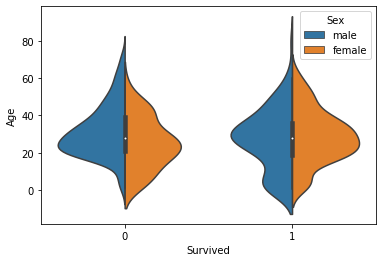

In [9]:
sns.violinplot(data=train, x='Survived', y='Age',hue='Sex',split=True)

The survivors were mostly females. Of the 342 survivors,only 109 were males. There is a high chance of survival for passengers aged between 20-40 for both male and female.

<Figure size 720x432 with 0 Axes>

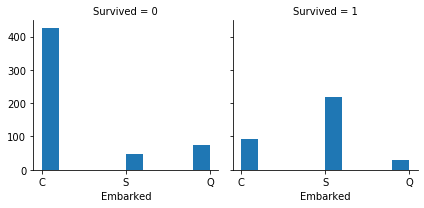

In [10]:
plt.figure(figsize=(10,6))
sns.FacetGrid(data=train, col= 'Survived').map(plt.hist, 'Embarked')

In [11]:
g= pd.crosstab(train['Embarked'],train['Survived'],margins=True)
g['% survivors']=g[1]/g['All']
g

Survived,0,1,All,% survivors
Embarked,,,,
C,75,93,168,0.553571
Q,47,30,77,0.389610
S,427,217,644,0.336957
All,549,340,889,0.382452


Most people embarked on the S port. The C port has the highest % of survivors.

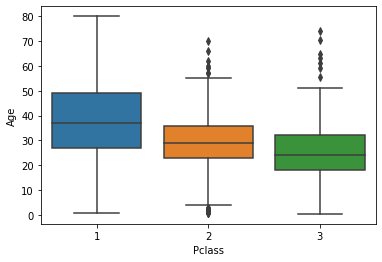

In [12]:
sns.boxplot(data=train, x='Pclass',y='Age')

The median age decreased with Pclass. On the average,the oldest people got the first class ticket.

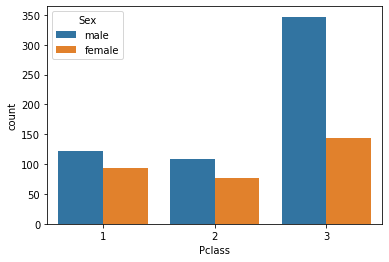

In [13]:
sns.countplot(data=train, x='Pclass', hue='Sex')

In [14]:
p=pd.crosstab(train['Pclass'], train['Survived'],margins=True)
p['% survivors']=p[1]/p['All']
p

Survived,0,1,All,% survivors
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363
All,549,342,891,0.383838


Most people got the 3rd class ticket probably because it's cheaper, majorly males.

The % of survivors decreased with class. Mostly people in the 1st class survived, followed by the 2nd class and then third.


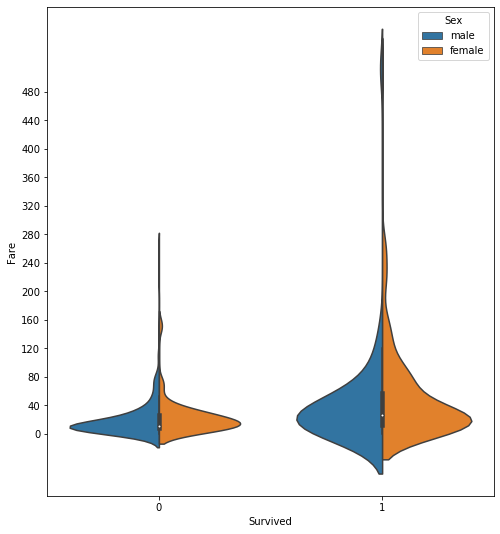

In [15]:
plt.figure(figsize=(8,9))
plt.axes(yticks= range(0,500,40))
sns.violinplot(data=train, y='Fare', x='Survived',hue='Sex',split=True)

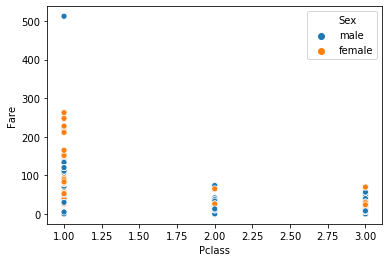

In [16]:
sns.scatterplot(data=train, x= 'Pclass', y='Fare',hue='Sex')

Wow... no one that paid a fare above 300 died. Mostly people that paid  below 40 died. 

# 2. Data Cleaning and Feature Engineering

In [17]:
train['Title']=train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
train['Title']=train['Title'].replace(['Mlle','Ms','Mme','Rev','Don','Major','Capt','Lady','Sir','the Countess','Jonkheer','Dr','Col'],
                       ['Miss','Miss','Mrs','Mr','Mr','Mr','Mr','Mrs','Mr','Mrs','Other','Other','Other'])
# I have obtained titles from the name column, and grouped them into 5 categories
train['Title'].value_counts()

Mr        528
Miss      185
Mrs       128
Master     40
Other      10
Name: Title, dtype: int64

In [18]:
train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.967568,0.702703,2.291892,21.845638,0.702703,0.540541,43.800092
Mr,455.026515,0.157197,2.392045,32.756724,0.287879,0.153409,24.543298
Mrs,455.718750,0.796875,1.976562,35.873874,0.687500,0.812500,45.607161
Other,598.700000,0.400000,1.200000,45.111111,0.400000,0.000000,40.622920


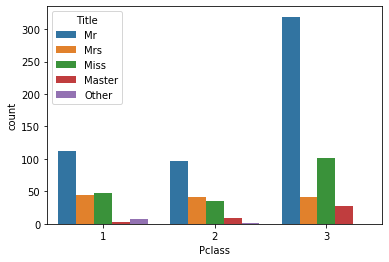

In [19]:
# This should show me the relationship btw Pclass and Title
sns.countplot(data=train,x='Pclass', hue='Title')

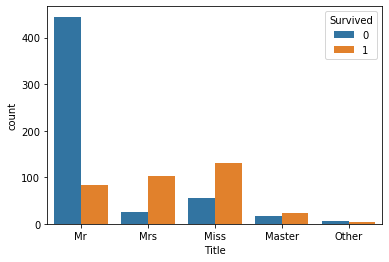

In [20]:
sns.countplot(data=train,x='Title', hue='Survived')

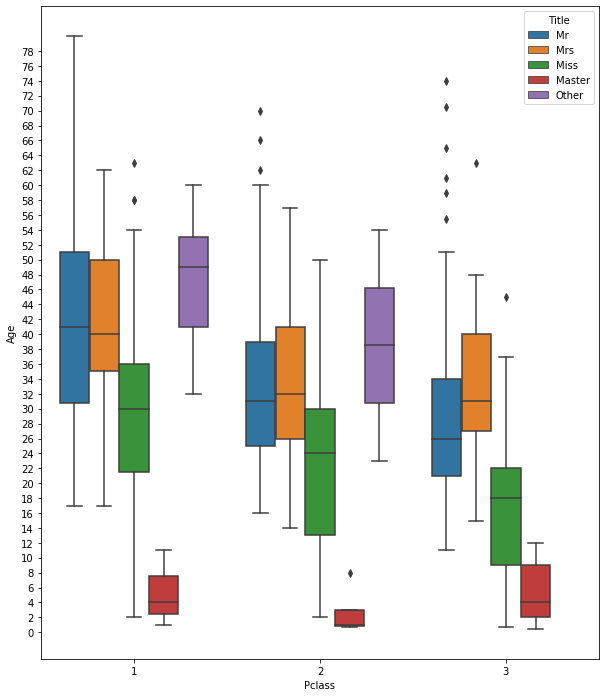

In [21]:
# from the exploratory analysis, Pclass is related to age, age should also depend on title.
plt.figure(figsize=(10,12))
plt.axes(yticks=range(0,80,2))
sns.boxplot(data=train,x='Pclass',y='Age',hue='Title')

I'll then use this boxplot to fillin the null age values with the median age based on Pclass and Title 

In [22]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    Title=col[2]
    if pd.isnull(Age)== True:
        if Pclass== 1:
            if Title=='Mr':
                return 41
            elif Title=='Mrs':
                return 40
            elif Title=='Miss':
                return 30
            elif Title=='Master':
                return 4
            else:
                return 49
        elif Pclass == 2:
            if Title=='Mr':
                return 31
            elif Title=='Mrs':
                return 32
            elif Title=='Miss':
                return 25
            elif Title=='Master':
                return 0
            else:
                return 40
        else:
            if Title=='Mr':
                return 27
            elif Title=='Mrs':
                return 32
            elif Title=='Miss':
                return 18
            else:
                return 4
    else:
        return (Age)

In [23]:
train['Age']= train[['Age', 'Pclass','Title']].apply(impute_age, axis=1)
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    18.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
train.groupby('Embarked')['Name'].count()

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64

Since majority of the people embarked on the S port, I'll fill in S for the two null Embarked

In [25]:
train['Embarked'].fillna('S',inplace=True)

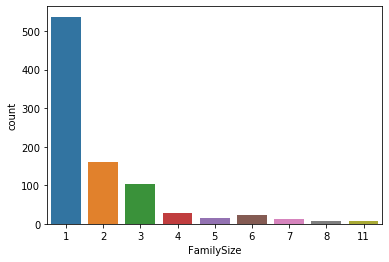

In [26]:
train['FamilySize']= train['Parch']+ train['SibSp']+1
sns.countplot(data=train, x='FamilySize')

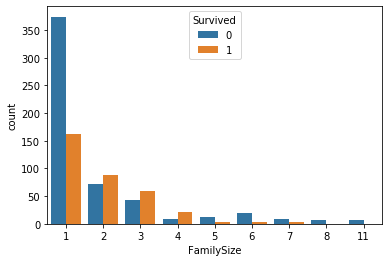

In [27]:
sns.countplot(data=train, hue='Survived',x='FamilySize')

In [28]:
#I group the family size such that 1=single, 2-4=small family, 5-11=large family...
train['FamilySize'].replace([2,3,4,5,6,7,8,11],[2,2,2,3,3,3,3,3],inplace=True)
# where 1 represents 'single',2 represents 'small family' and 3 represents, 'large family'.

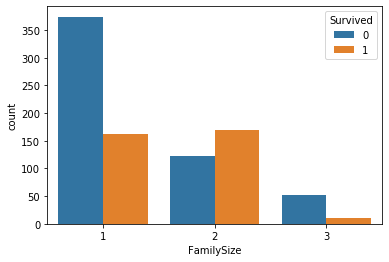

In [29]:
sns.countplot(data=train, hue='Survived',x='FamilySize')

Survival rate decreased with increasing family size. Mostly the singles survived, then the small families and lastly the large families.

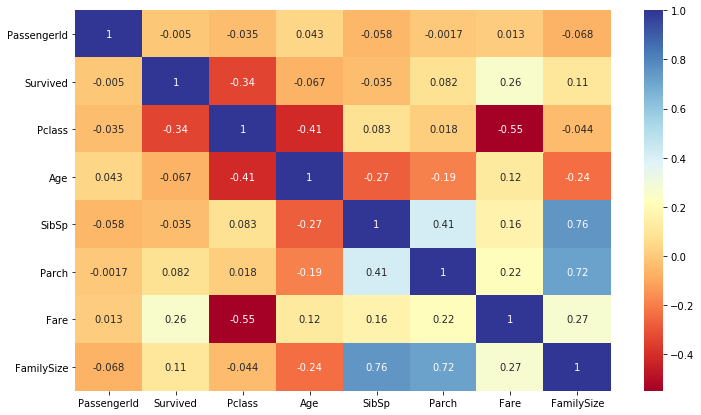

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(),cmap='RdYlBu',annot=True)

Sibsp and Parch are highly correlated to Familysize, so I'll just drop SibSp and Parch. I will also drop Passenger Id (it's basically the same as index), Cabin (too many null values),Ticket and Name (My model can't understand them).

In [31]:
train.drop(['PassengerId','Cabin','Ticket','Name','SibSp','Parch'], axis=1 ,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


In [32]:
# getting dummies for the categorical data
train= pd.get_dummies(data=train,columns=['Sex','Embarked','Title','FamilySize','Pclass'],drop_first=True)
train.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_2,FamilySize_3,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,0,0,0,0,0,1,0,1,0,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,1,0,0,1,0,1,0,0,0
4,0,35.0,8.0500,1,0,1,0,1,0,0,0,0,0,1


In [33]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [34]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
s.fit(x_train)
scaled_train= s.transform(x_train)
scaled_train=pd.DataFrame(data=scaled_train,columns=x_train.columns)
scaled_train

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_2,FamilySize_3,Pclass_2,Pclass_3
0,-0.539306,-0.502445,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,1.432260,-0.273476,-0.510152,0.902587
1,0.647319,0.786845,-1.355574,-0.307562,-1.623803,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,-1.107926
2,-0.242650,-0.488854,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
3,0.424827,0.420730,-1.355574,-0.307562,0.615838,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,-1.107926
4,0.424827,-0.486337,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.168486,-0.386671,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,1.960202,-1.107926
887,-0.761798,-0.044381,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,-1.107926
888,-0.835962,-0.176263,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,1.432260,-0.273476,-0.510152,0.902587
889,-0.242650,-0.044381,0.737695,-0.307562,-1.623803,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,-1.107926


In [35]:
# I'll start cleaning the test data now!
test=pd.read_csv('Titanic test.csv')
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here, Cabin, Fare and Age have null values

In [38]:
test['Title']=test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [39]:
test['Title']=test['Title'].replace(['Ms','Rev','Dona','Dr','Col'],
                       ['Miss','Mr','Mrs','Other','Other'])
test['Title'].value_counts()

Mr        242
Miss       79
Mrs        73
Master     21
Other       3
Name: Title, dtype: int64

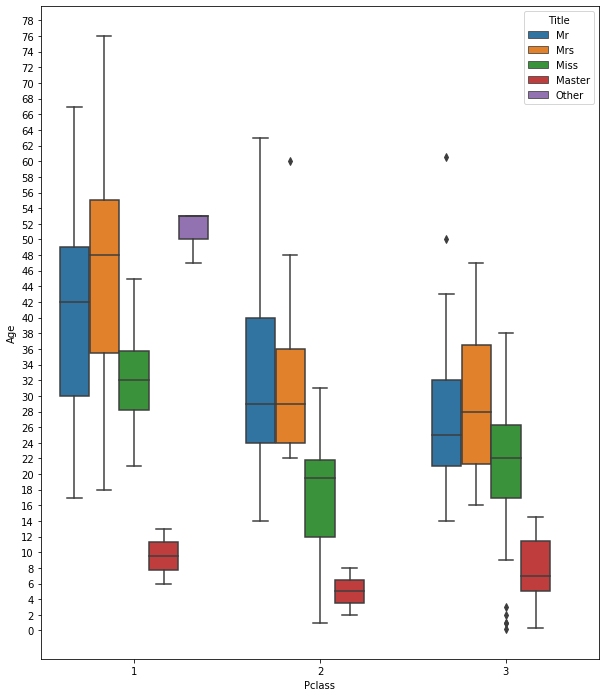

In [40]:
plt.figure(figsize=(10,12))
plt.axes(yticks=range(0,80,2))
sns.boxplot(data=test,x='Pclass',y='Age',hue='Title')

In [41]:
def impute_age2(col):
    Age=col[0]
    Pclass=col[1]
    Title=col[2]
    if pd.isnull(Age)== True:
        if Pclass== 1:
            if Title=='Mr':
                return 42
            elif Title=='Mrs':
                return 48
            elif Title=='Miss':
                return 32
            elif Title=='Master':
                return 10
            else:
                return 53
        elif Pclass == 2:
            if Title=='Mr':
                return 29
            elif Title=='Mrs':
                return 29
            elif Title=='Miss':
                return 20
            else:
                return 6
        else:
            if Title=='Mr':
                return 25
            elif Title=='Mrs':
                return 29
            elif Title=='Miss':
                return 23
            else:
                return 7
    else:
        return (Age)

In [42]:
# filling in nan Age values
test['Age']= test[['Age', 'Pclass','Title']].apply(impute_age2, axis=1)
test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    25.0
414    39.0
415    38.5
416    25.0
417     7.0
Name: Age, Length: 418, dtype: float64

In [43]:
# I will fin in the nan fare value by imputing the mean fare of its ticket class
test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [44]:
test[test['Fare'].isnull()== True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [45]:
test['Fare'].fillna(12.459678,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 29.5+ KB


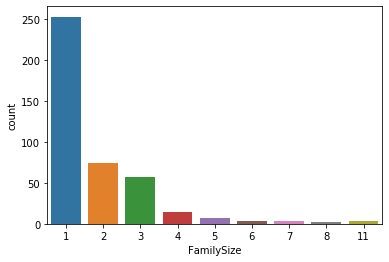

In [46]:
test['FamilySize']= test['Parch']+ test['SibSp']+1
sns.countplot(data=test, x='FamilySize')

In [47]:
test['FamilySize'].replace([2,3,4,5,6,7,8,11],[2,2,2,3,3,3,3,3],inplace=True)
# where 1 represents 'Single',2 represets 'small family' and 3 represents, 'large family'.

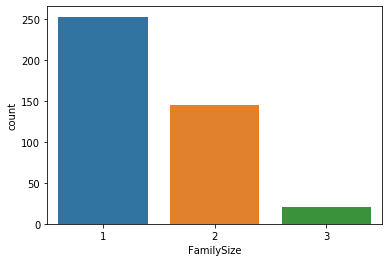

In [48]:
sns.countplot(data=test, x='FamilySize')

There are mostly singles

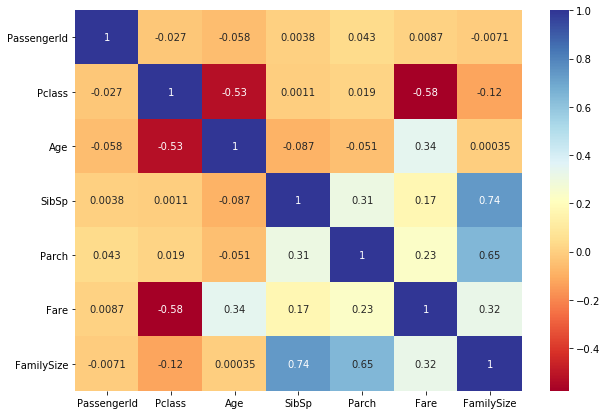

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(test.corr(),annot=True,cmap='RdYlBu')

In [50]:
test.drop(['PassengerId','Cabin','Ticket','Name','SibSp','Parch'], axis=1 ,inplace=True)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,male,34.5,7.8292,Q,Mr,1
1,3,female,47.0,7.0000,S,Mrs,2
2,2,male,62.0,9.6875,Q,Mr,1
3,3,male,27.0,8.6625,S,Mr,1
4,3,female,22.0,12.2875,S,Mrs,2


In [51]:
test= pd.get_dummies(data=test,columns=['Sex','Embarked','Title','FamilySize','Pclass'],drop_first=True)
test.head()

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_2,FamilySize_3,Pclass_2,Pclass_3
0,34.5,7.8292,1,1,0,0,1,0,0,0,0,0,1
1,47.0,7.0000,0,0,1,0,0,1,0,1,0,0,1
2,62.0,9.6875,1,1,0,0,1,0,0,0,0,1,0
3,27.0,8.6625,1,0,1,0,1,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,0,0,1,0,1,0,0,1


In [52]:

scaled_test= s.transform(test)
scaled_test=pd.DataFrame(data=scaled_test,columns=test.columns)
scaled_test

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_2,FamilySize_3,Pclass_2,Pclass_3
0,0.387745,-0.490783,0.737695,3.251373,-1.623803,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
1,1.314796,-0.507479,-1.355574,-0.307562,0.615838,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,0.902587
2,2.427258,-0.453367,0.737695,3.251373,-1.623803,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,1.960202,-1.107926
3,-0.168486,-0.474005,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
4,-0.539306,-0.401017,-1.355574,-0.307562,0.615838,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.316814,-0.486337,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
414,0.721483,1.544246,-1.355574,-0.307562,-1.623803,-0.511898,-1.206045,2.441503,-0.10654,-0.698197,-0.273476,-0.510152,-1.107926
415,0.684401,-0.502445,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
416,-0.316814,-0.486337,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587


# 3. Model Selection and hyper parameter tuning

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [63]:
param={
    'LogisticR':{'model':LogisticRegression(),
                 'params':{'C':[1,3,15,9]}
                },
     'Adaboost':{'model':AdaBoostClassifier(),
                     'params':{'n_estimators':[50,90,300,400]}
                      },
    
      'svc':{'model':SVC(),
            'params':{'C':[1,3,9,8],'kernel':['linear','rbf']}
            },
    'RandomF':{'model': RandomForestClassifier(),
              'params':{'n_estimators':[50,70,300,400],'criterion':['gini','entropy']}
              }
}

In [64]:
from sklearn.model_selection import GridSearchCV
score=[]
for model, mp in param.items():
    cv=GridSearchCV(mp['model'],mp['params'],cv=5)
    cv.fit(scaled_train, y_train)
    score.append({'model_name':model,
                 'params':cv.best_params_,
                 'score':cv.best_score_})
    
pd.DataFrame(score)

,model_name,params,score
0,LogisticR,{'C': 15},0.828272
1,Adaboost,{'n_estimators': 90},0.830550
2,svc,"{'C': 3, 'kernel': 'rbf'}",0.830538
3,RandomF,"{'criterion': 'entropy', 'n_estimators': 50}",0.809202


# 4. Predictive Modelling

In [65]:

abc= AdaBoostClassifier(n_estimators=90)
abc.fit(scaled_train, y_train)
predictions=abc.predict(scaled_test)

In [66]:
# I'll read the submission file from kaggle and then replace the survived column with my predictions.
submission= pd.read_csv('gender_submission.csv')

In [67]:
submission['Survived']= predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
submission.to_csv('Mysubmission_api',index=False)

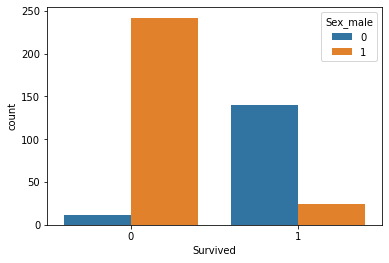

In [69]:
sns.countplot(data=submission,x='Survived', hue=test['Sex_male'])

In [70]:
submission.groupby('Survived').count()



,PassengerId
Survived,
0,254
1,164


In [71]:
scaled_train

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_2,FamilySize_3,Pclass_2,Pclass_3
0,-0.539306,-0.502445,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,1.432260,-0.273476,-0.510152,0.902587
1,0.647319,0.786845,-1.355574,-0.307562,-1.623803,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,-1.107926
2,-0.242650,-0.488854,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
3,0.424827,0.420730,-1.355574,-0.307562,0.615838,-0.511898,-1.206045,2.441503,-0.10654,1.432260,-0.273476,-0.510152,-1.107926
4,0.424827,-0.486337,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.168486,-0.386671,0.737695,-0.307562,0.615838,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,1.960202,-1.107926
887,-0.761798,-0.044381,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,-1.107926
888,-0.835962,-0.176263,-1.355574,-0.307562,0.615838,1.953514,-1.206045,-0.409584,-0.10654,1.432260,-0.273476,-0.510152,0.902587
889,-0.242650,-0.044381,0.737695,-0.307562,-1.623803,-0.511898,0.829156,-0.409584,-0.10654,-0.698197,-0.273476,-0.510152,-1.107926
